# Import Data

In [31]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Connect to PostgreSQL server
import os
from dotenv import load_dotenv
load_dotenv()
from pangres import upsert
from sqlalchemy import text, create_engine

# db info
db_username = os.environ.get('db_username')
db_password = os.environ.get('db_password')
db_host = os.environ.get('db_host')
db_port = os.environ.get('db_port')
db_name = os.environ.get('db_name')

def create_db_connection_string(db_username, db_password, db_host, db_port, db_name):
    connection_url = 'postgresql+psycopg2://' + db_username + ':' + db_password + '@' + db_host + ':' + db_port + '/' + db_name
    return connection_url

conn = create_db_connection_string(db_username, db_password, db_host, db_port, db_name)

db_engine = create_engine(conn, pool_recycle = 3600)

# Create DataFrame
with db_engine.connect() as connection:
    df = pd.read_sql(text('select * from soloq.matchesv2'), connection)


In [408]:
df.head()

,uuid,totalHealsOnTeammates,largestCriticalStrike,damageSelfMitigated,bountyLevel,consumablesPurchased,spell1Casts,spell2Casts,spell3Casts,spell4Casts,...,sightWardsBoughtInGame,longestTimeSpentLiving,timeCCingOthers,timePlayed,totalTimeCCDealt,totalTimeSpentDead,gameEndedInEarlySurrender,gameEndedInSurrender,teamEarlySurrendered,win
0,NA1_4924206959_NE11HKlSYE5wsbANOMEuIoMR4-mUIhz...,0,19,151576,1,2,133,76,80,16,...,0,386,60,2706,841,359,False,False,False,True
1,NA1_4924206959_uNbMmHbumM_uRxXzyYSq4ELwRdo_IW6...,0,0,62892,2,1,189,139,137,17,...,0,399,9,2706,198,372,False,False,False,True
2,NA1_4924206959_mEJPEQFXkjonzxpxH_eEw36B7QIteqC...,0,899,31583,0,7,86,24,194,23,...,0,455,6,2706,45,727,False,False,False,True
3,NA1_4924206959_jz-fC66zgWp7B_ZCYUyDdQlrWKnLnQw...,0,889,15312,6,11,109,153,48,14,...,0,485,11,2706,234,468,False,False,False,True
4,NA1_4924206959_RpXIl-a4MHzZtES0PwNWFOQltGTZO-u...,2444,0,27500,2,2,79,61,19,10,...,0,440,44,2706,803,191,False,False,False,True


In [409]:
df.shape

(719590, 96)

In [410]:
df.columns

Index(['uuid', 'totalHealsOnTeammates', 'largestCriticalStrike',
       'damageSelfMitigated', 'bountyLevel', 'consumablesPurchased',
       'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts',
       'summoner1Casts', 'summoner1Id', 'summoner2Casts', 'summoner2Id',
       'matchId', 'teamId', 'gameDuration', 'gameVersion', 'summonerName',
       'puuid', 'lane', 'role', 'summonerLevel', 'teamPosition',
       'champExperience', 'champLevel', 'championName', 'kills', 'deaths',
       'assists', 'doubleKills', 'tripleKills', 'quadraKills', 'pentaKills',
       'largestKillingSpree', 'largestMultiKill', 'killingSprees',
       'firstBloodAssist', 'firstBloodKill', 'unrealKills', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamage

Irrelevant features: uuid, spell 1-4 casts, summoner 1-2 casts, matchid, teamid, gameversion, summonerName, puuid, lane, role, summonerLevel, neutralMinionsKilled, sightWardsBoughtInGame, timePlayed, totalTimeSpentDead, teamEarlySurrendered. These are all features that are either completely irrelevant to champion class, or have duplicates in the dataset.

In [32]:
# Dropping Irrelevant Features
df = df.drop(columns=['uuid', 'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts',
              'summoner1Casts', 'summoner2Casts', 'matchId', 'teamId',
              'gameVersion', 'summonerName', 'puuid', 'lane', 'role', 'summonerLevel',
              'neutralMinionsKilled', 'sightWardsBoughtInGame', 'timePlayed', 'totalTimeSpentDead', 'teamEarlySurrendered', 'unrealKills',
              'largestMultiKill', 'damageDealtToTurrets', 'inhibitorTakedowns', 'turretTakedowns', 'turretsLost', 'goldSpent',
              'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'detectorWardsPlaced', 'wardsPlaced', 'champLevel', 'totalTimeCCDealt'])

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719590 entries, 0 to 719589
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   totalHealsOnTeammates           719590 non-null  int64 
 1   largestCriticalStrike           719590 non-null  int64 
 2   damageSelfMitigated             719590 non-null  int64 
 3   bountyLevel                     719590 non-null  int64 
 4   consumablesPurchased            719590 non-null  int64 
 5   summoner1Id                     719590 non-null  int64 
 6   summoner2Id                     719590 non-null  int64 
 7   gameDuration                    719590 non-null  int64 
 8   teamPosition                    719590 non-null  object
 9   champExperience                 719590 non-null  int64 
 10  championName                    719590 non-null  object
 11  kills                           719590 non-null  int64 
 12  deaths                        

In [419]:
df[df.isna() == True].count()

totalHealsOnTeammates             0
largestCriticalStrike             0
damageSelfMitigated               0
bountyLevel                       0
consumablesPurchased              0
summoner1Id                       0
summoner2Id                       0
gameDuration                      0
teamPosition                      0
champExperience                   0
championName                      0
kills                             0
deaths                            0
assists                           0
doubleKills                       0
tripleKills                       0
quadraKills                       0
pentaKills                        0
largestKillingSpree               0
killingSprees                     0
firstBloodAssist                  0
firstBloodKill                    0
totalDamageDealt                  0
totalDamageDealtToChampions       0
totalDamageShieldedOnTeammates    0
totalDamageTaken                  0
totalHeal                         0
trueDamageDealt             

# Numerical features

In [180]:
df.select_dtypes(include = np.number).columns

Index(['totalHealsOnTeammates', 'largestCriticalStrike', 'damageSelfMitigated',
       'bountyLevel', 'consumablesPurchased', 'summoner1Id', 'summoner2Id',
       'gameDuration', 'champExperience', 'kills', 'deaths', 'assists',
       'doubleKills', 'tripleKills', 'quadraKills', 'pentaKills',
       'largestKillingSpree', 'killingSprees', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'baronKills', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'objectivesStolen',
       'objectivesStolenAssists', 'dragonKills', 'inhibitorKills',
       'inhibitorsLost', 'turretKills', 'goldEarned', 'totalMinionsKilled',
       'itemsPurchased', 'visionScore', 'vi

In [19]:
df.select_dtypes(include = np.number).describe()

,totalHealsOnTeammates,largestCriticalStrike,damageSelfMitigated,bountyLevel,consumablesPurchased,summoner1Id,summoner2Id,gameDuration,champExperience,kills,...,inhibitorsLost,turretKills,goldEarned,totalMinionsKilled,itemsPurchased,visionScore,visionWardsBoughtInGame,wardsKilled,longestTimeSpentLiving,timeCCingOthers
count,701540.000000,701540.000000,701540.000000,701540.000000,701540.000000,701540.000000,701540.000000,701540.000000,701540.000000,701540.000000,...,701540.000000,701540.000000,701540.000000,701540.000000,701540.000000,701540.000000,701540.000000,701540.000000,701540.000000,701540.000000
mean,471.975913,220.783694,21868.905093,0.989764,3.163165,7.227031,7.646476,1804.520441,13728.616089,6.204618,...,1.052606,1.144699,11700.689151,121.066226,20.298830,25.937543,1.253658,2.460497,605.146351,26.339400
std,1930.678930,373.745280,20218.136621,2.031036,2.621999,4.105607,4.210637,444.855785,4785.945840,4.790951,...,1.319207,1.390335,3946.370133,80.997763,5.503691,20.847780,1.923515,2.943667,294.224299,25.208103
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,222.000000,0.000000,0.000000,...,0.000000,0.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8896.000000,0.000000,1.000000,4.000000,4.000000,1543.000000,10497.000000,3.000000,...,0.000000,0.000000,9000.000000,39.000000,17.000000,13.000000,0.000000,0.000000,408.000000,10.000000
50%,0.000000,0.000000,15492.000000,0.000000,2.000000,4.000000,6.000000,1805.000000,13551.000000,5.000000,...,1.000000,1.000000,11468.000000,128.000000,20.000000,20.000000,0.000000,2.000000,557.000000,21.000000
75%,0.000000,387.000000,28021.000000,1.000000,4.000000,11.000000,12.000000,2077.000000,16736.000000,9.000000,...,2.000000,2.000000,14161.000000,185.000000,24.000000,31.000000,2.000000,3.000000,753.000000,35.000000
max,81183.000000,8917.000000,392246.000000,38.000000,49.000000,21.000000,21.000000,4108.000000,56411.000000,44.000000,...,11.000000,11.000000,45890.000000,805.000000,129.000000,239.000000,48.000000,54.000000,3163.000000,525.000000


## Outliers
Methods like PCA are not robust to outliers because they affect the calculation of eigenvalues and eigenvectors from the data's corresponding covariance matrix. Because variance is reliant on the mean, and the mean is heavily influenced by skew and outliers. In a League of Legends however, it will be difficult to determine what outliers are meaningful, and what outliers may cause a negative impact. <br>
Thought process: So generally many of these features are champion dependent, for example, it might be logical for an AP champion to have high magic damage, but essentially zero physical damage. Champion specific conditions make it hard to identify what things are truly outliers. 


In [187]:
# Checking items purchased
df['itemsPurchased'].describe()

count    719590.000000
mean         19.860548
std           6.085628
min           0.000000
25%          16.000000
50%          20.000000
75%          24.000000
max         129.000000
Name: itemsPurchased, dtype: float64

It shouldn't really be possible to buy a ridiculous amount of items (greater than 25 around)

In [33]:
# Drop remade games (games that ended before 3 minutes)
df = df[df['gameEndedInEarlySurrender'] == False]

# Filter for AFK players
afk_players = df[(df['champExperience'] == 0) | (df['longestTimeSpentLiving'] == 0) | (df['itemsPurchased'] == 0)]
df = df.drop(index = afk_players.index)

# Games ending too early
trolled_games = df[(df['gameDuration'] < 900) & df['gameEndedInSurrender'] == True]
df = df.drop(index = trolled_games.index)

<Axes: >

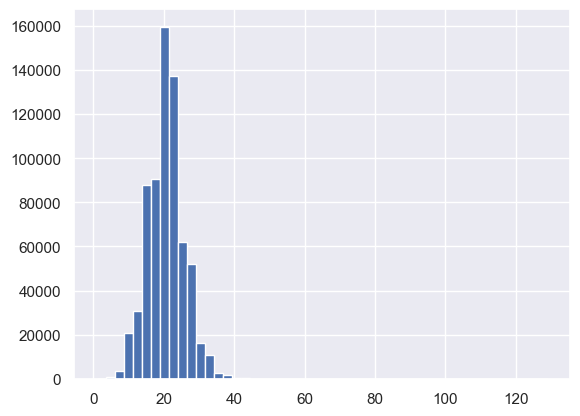

In [4]:
# See distribution of items purchased
df['itemsPurchased'].hist(bins = 50)

In [34]:
# IQR 
iqr = df['itemsPurchased'].quantile(0.75) - df['itemsPurchased'].quantile(0.25)
items_outliers = df[df['itemsPurchased'] > df['itemsPurchased'].quantile(0.75) + 1.5 * iqr]

In [452]:
items_outliers['itemsPurchased'].describe()

count    5452.000000
mean       37.483859
std         3.464832
min        35.000000
25%        35.000000
50%        36.000000
75%        38.000000
max       129.000000
Name: itemsPurchased, dtype: float64

It generally makes no sense to buy more than around 25 items even in the longest games, the people who are buying ridiculous amounts of items must be selling and re-buying over and over again.

In [35]:
# Drop people buying items at random
df = df.drop(index = items_outliers.index)

In [207]:
# I want to investigate people who die an absurd amount of times, they are likely trolling
df['deaths'].describe()

count    672576.000000
mean          6.402735
std           3.287402
min           0.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          34.000000
Name: deaths, dtype: float64

<Axes: >

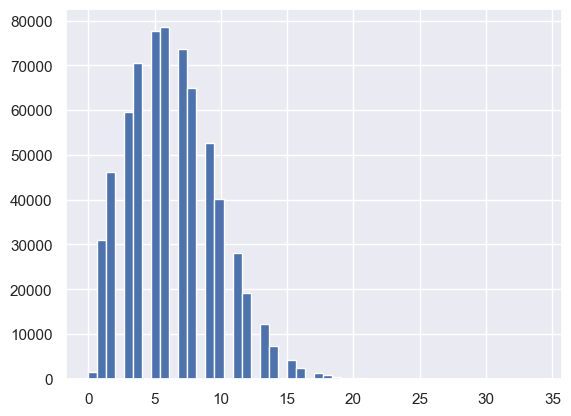

In [208]:
df['deaths'].hist(bins = 50)

In [36]:
trolls = df[(df['deaths'] > 10) & (df['assists'] == 0) & (df['kills'] == 0)]
df = df.drop(index = trolls.index)

In [7]:
# Shape after dropping outliers
df.shape

(672506, 58)

## Distributions

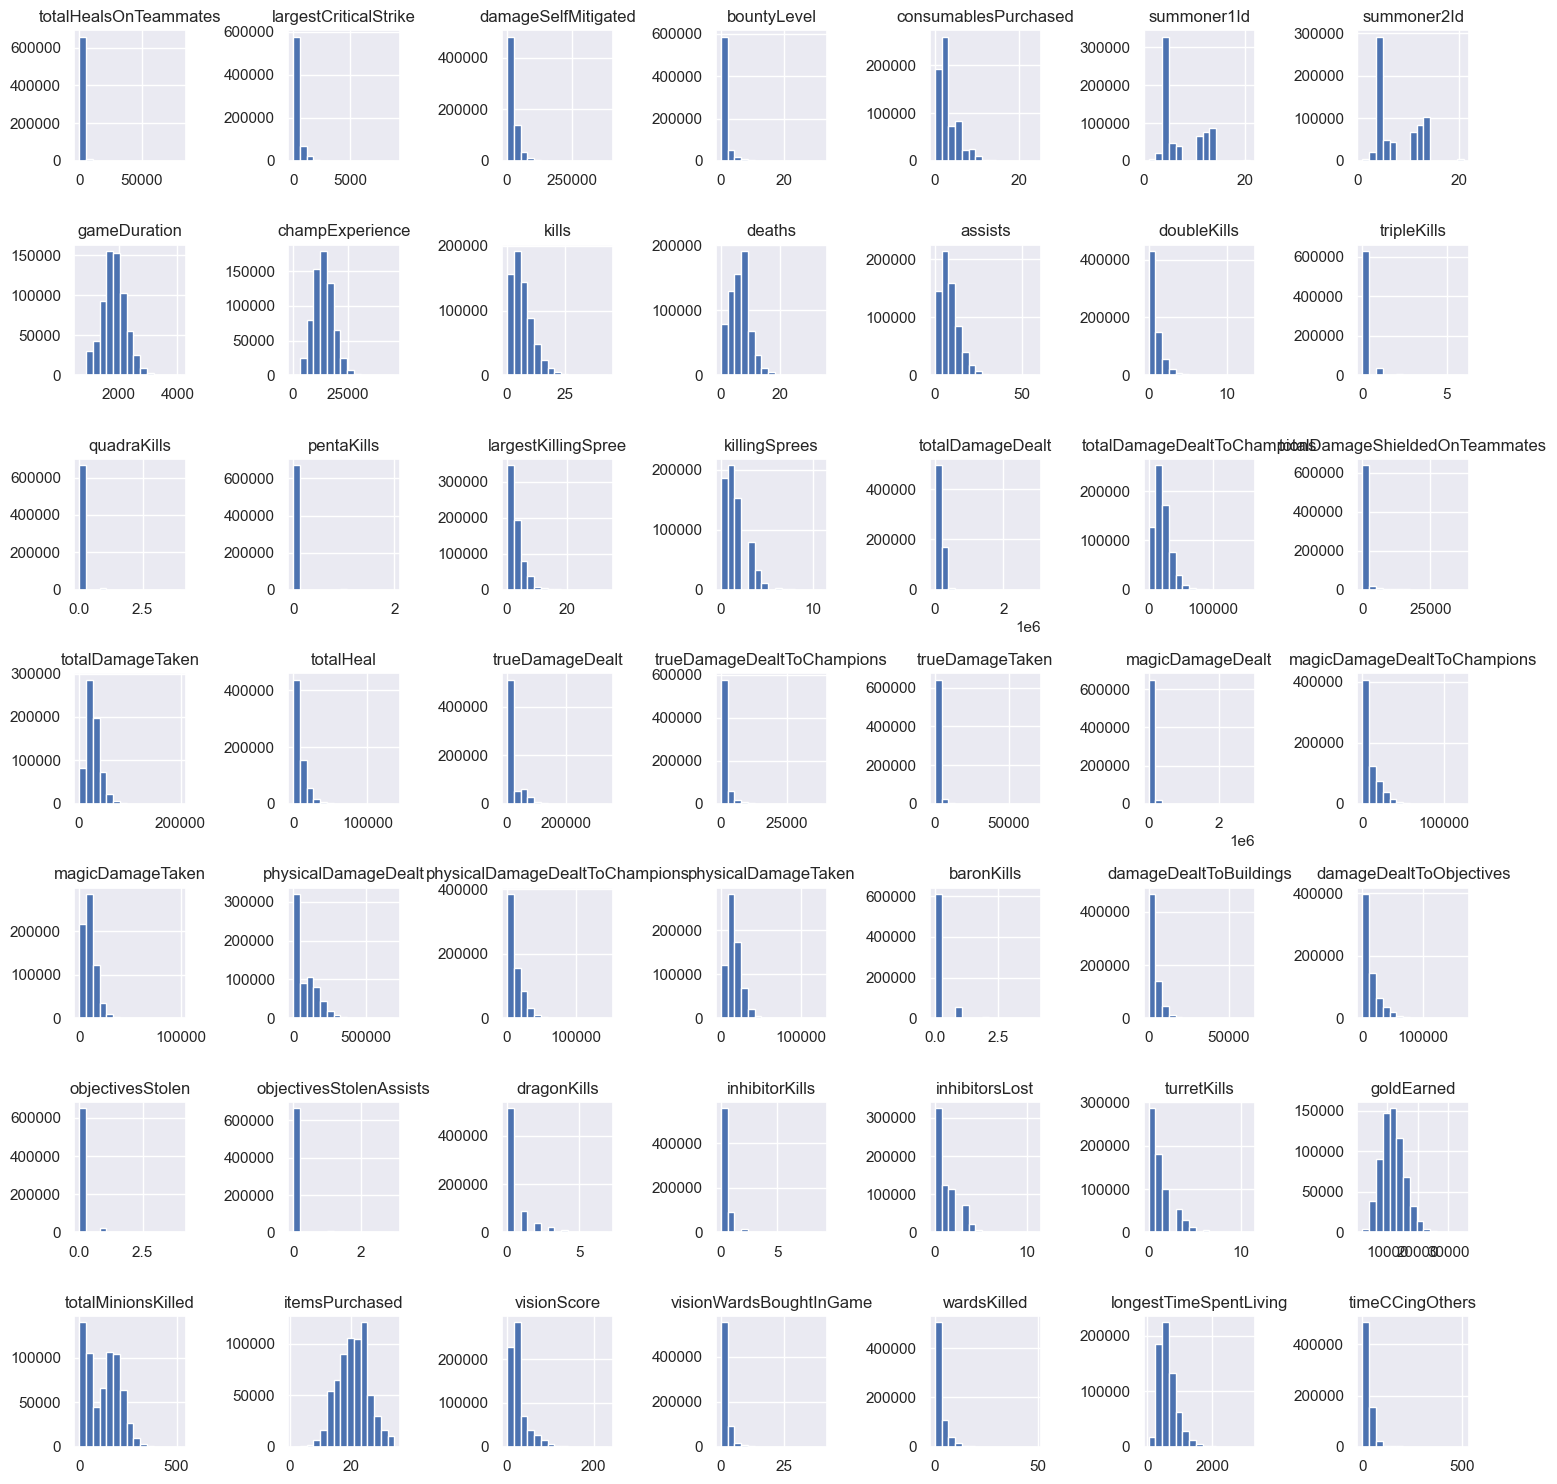

In [285]:
df.select_dtypes(include = np.number).hist(bins = 15, figsize = (15,15))
plt.tight_layout()

There are many zero-inflated distributions

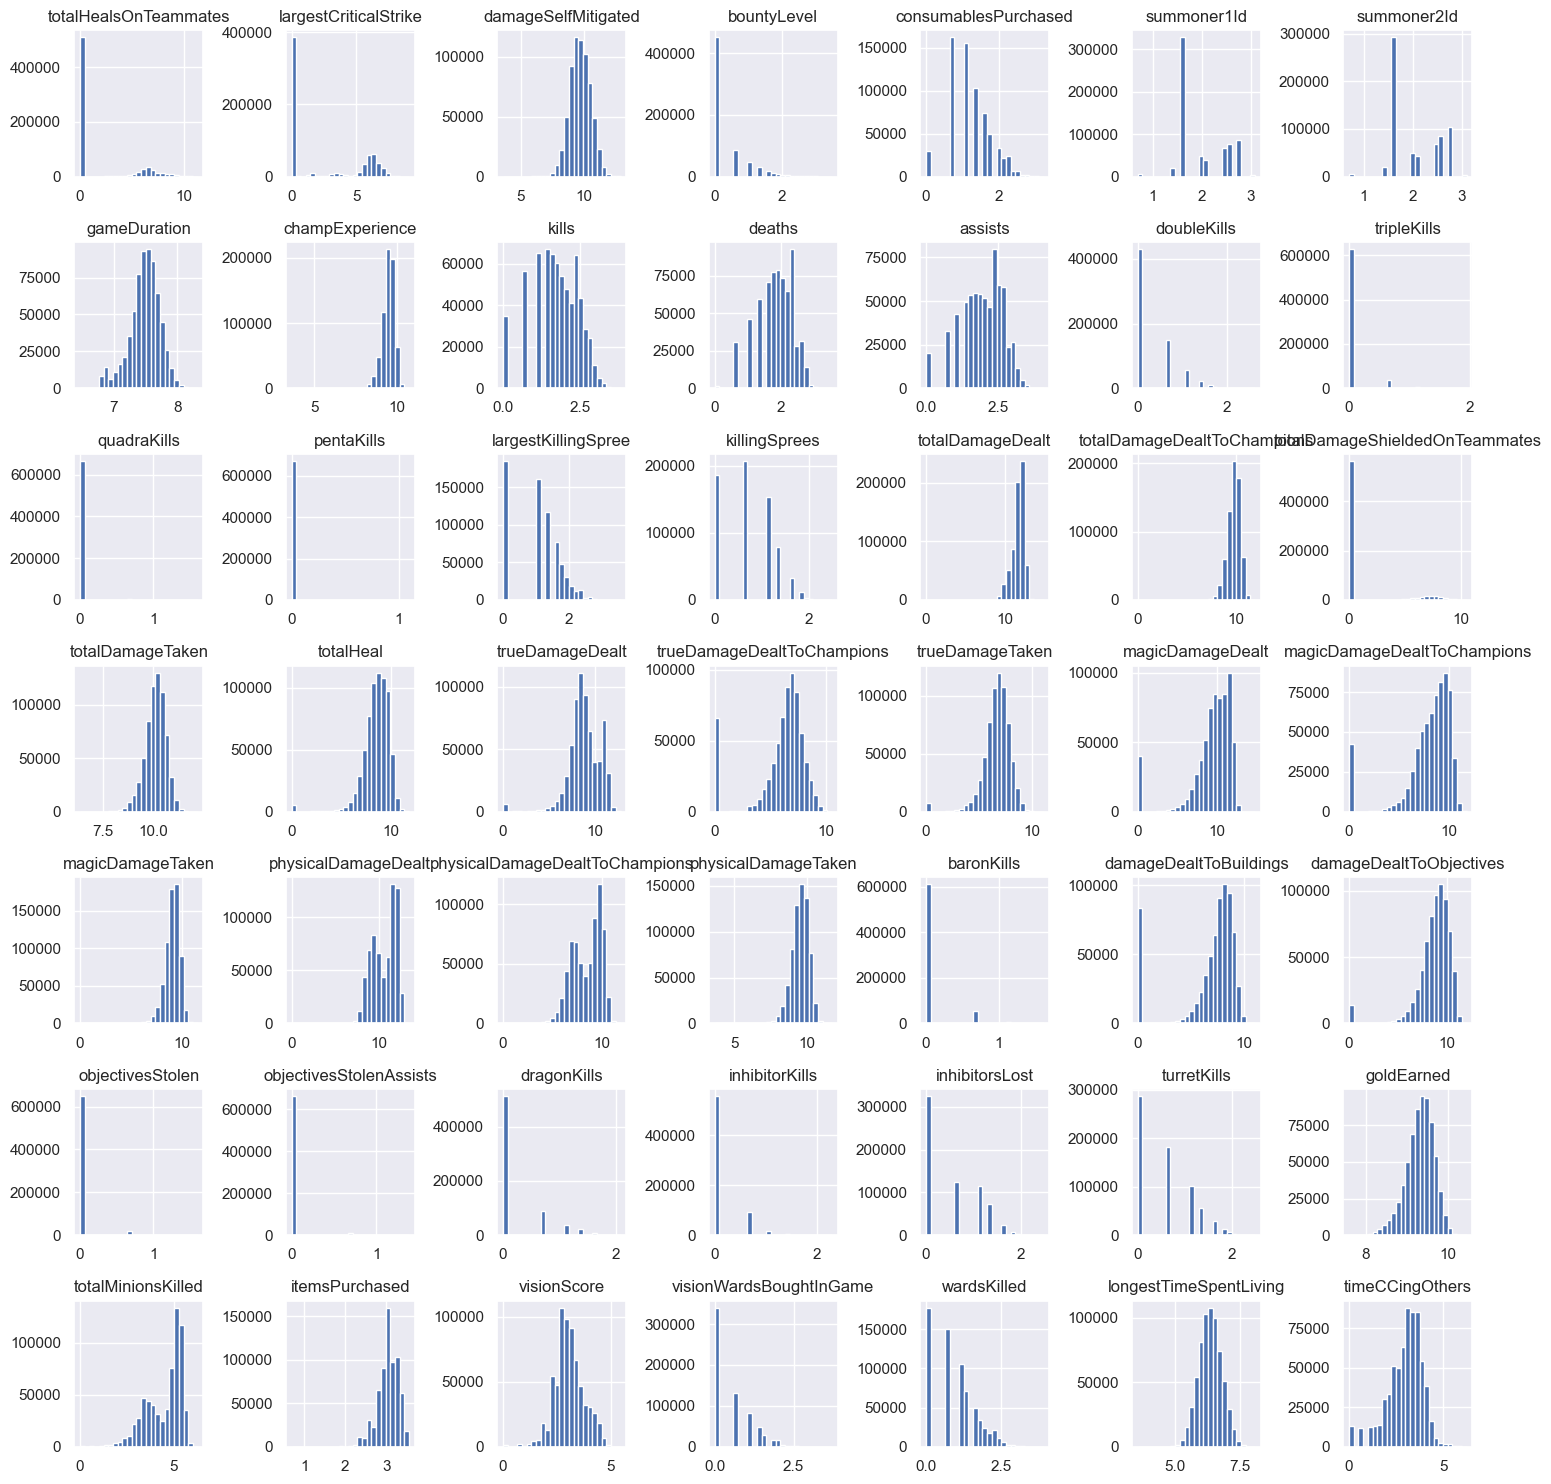

In [46]:
np.log(df.select_dtypes(include = np.number) + 1).hist(bins = 25, figsize = (15,15))
plt.tight_layout()

Need to apply log transform to power law distributed features, bin others maybe?

## Game Duration

<Axes: xlabel='gameDuration', ylabel='Count'>

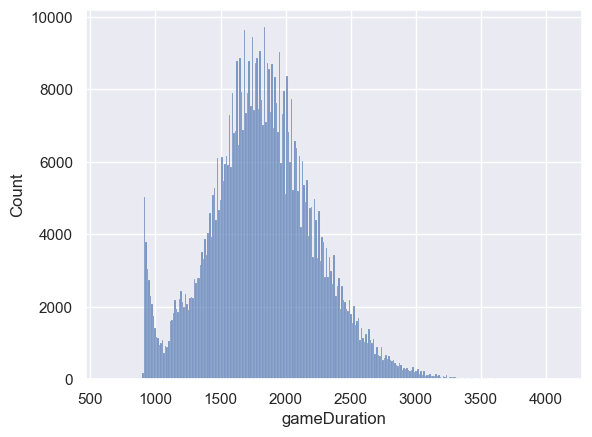

In [281]:
sns.histplot(data = df, x = 'gameDuration')

Normally distributed except huge spike at the 16 minute mark. Most likely represents games that were surrendered as soon as possible (15 minutes is the minimum)

<Axes: xlabel='gameDuration', ylabel='Count'>

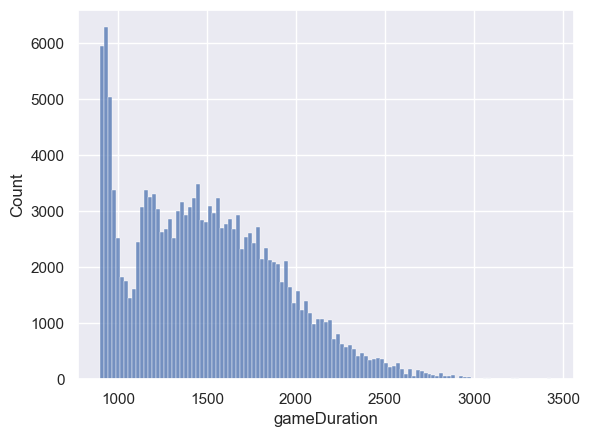

In [149]:
sns.histplot(data = df[df['gameEndedInSurrender'] == True], x = 'gameDuration')

Out of all surrendered games, a large proportion are surrendered around 16 minutes

In [150]:
print("Average Surrendered Game Duration: %.2f minutes" % (df['gameDuration'][df['gameEndedInSurrender'] == True].mean()/60))
print("Median Surrendered Game Duration: %.2f minutes" % (df['gameDuration'][df['gameEndedInSurrender'] == True].median()/60))
print("Percent of Surrendered Games between 15 and 17 minutes: %.2f%%" % (len(df[(df['gameEndedInSurrender'] == True) & (df['gameDuration'] >= 15*60) & (df['gameDuration'] <= 17*60)])*100 / len(df[df['gameEndedInSurrender'] == True])))


Average Surrendered Game Duration: 25.11 minutes
Median Surrendered Game Duration: 24.43 minutes
Percent of Surrendered Games between 15 and 17 minutes: 15.19%


## Correlations

In [151]:
corr = df.select_dtypes(include = np.number).corr()

<Axes: >

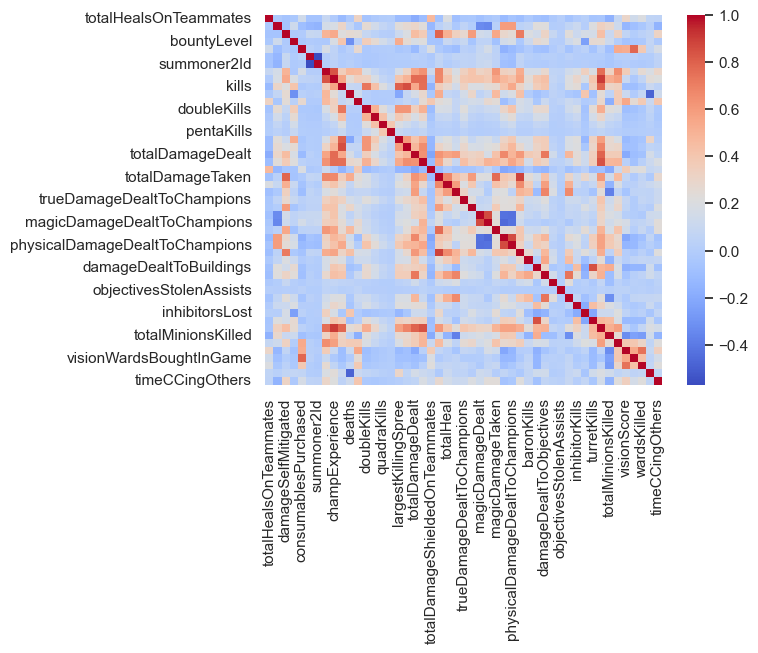

In [152]:
sns.heatmap(corr, cmap = 'coolwarm')

We can see the data is multicollinear, which is expected from a game many features influence one another (i.e kills gets you gold, gold buys you items etc.)

## Correlation With Game Duration

In [8]:
time_corrs = df.select_dtypes(include = np.number).corr()['gameDuration'].drop('gameDuration')
time_corrs.sort_values(ascending=False)

champExperience                   0.833548
goldEarned                        0.752729
totalDamageTaken                  0.675051
itemsPurchased                    0.654045
totalDamageDealtToChampions       0.630487
magicDamageTaken                  0.610926
totalDamageDealt                  0.560816
physicalDamageTaken               0.528069
damageSelfMitigated               0.493431
deaths                            0.470085
assists                           0.464556
trueDamageTaken                   0.409216
visionScore                       0.363268
kills                             0.346572
magicDamageDealtToChampions       0.345023
totalHeal                         0.335308
trueDamageDealtToChampions        0.332492
inhibitorsLost                    0.330941
physicalDamageDealt               0.330507
totalMinionsKilled                0.317435
magicDamageDealt                  0.313453
killingSprees                     0.310323
physicalDamageDealtToChampions    0.308598
timeCCingOt

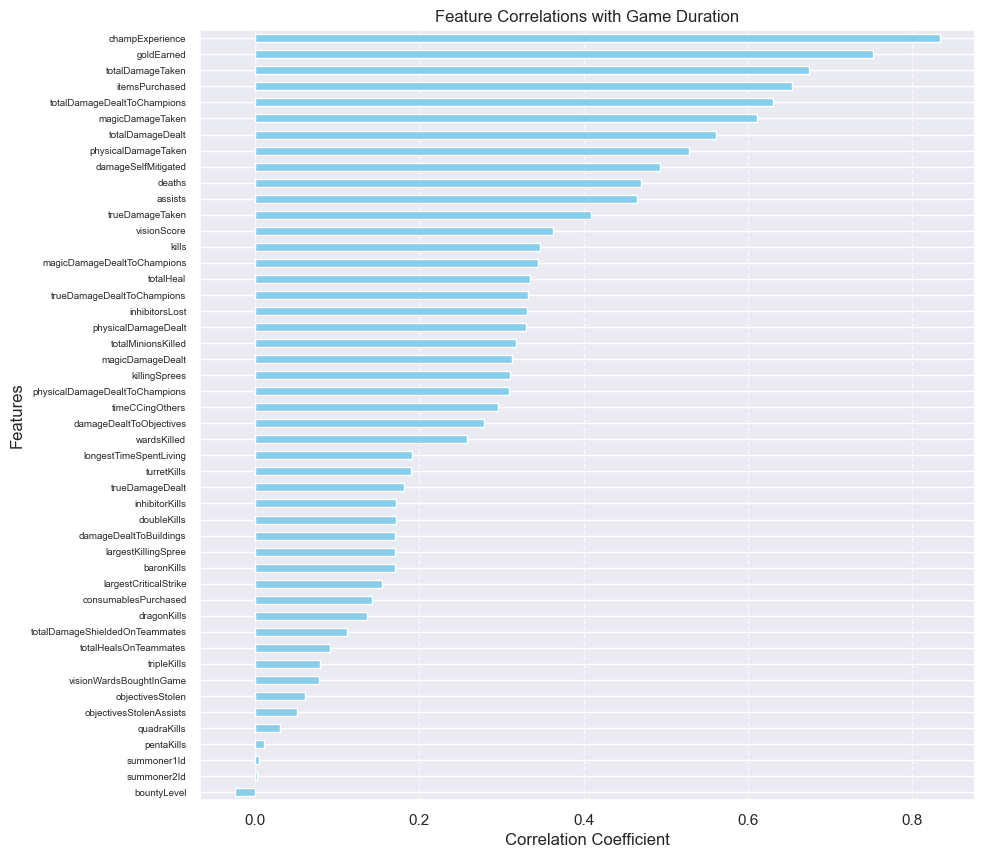

In [9]:
# Bar chart
plt.figure(figsize=(10, 10))
time_corrs.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Correlations with Game Duration')
plt.xlabel('Correlation Coefficient')
plt.yticks(fontsize=7)
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Categorical Features

In [156]:
df.select_dtypes(include = ['object', 'bool']).columns

Index(['teamPosition', 'championName', 'firstBloodAssist', 'firstBloodKill',
       'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender',
       'gameEndedInSurrender', 'win'],
      dtype='object')

In [163]:
df['teamPosition'].value_counts()

teamPosition
BOTTOM     136027
TOP        135695
JUNGLE     135512
UTILITY    135438
MIDDLE     135331
               25
Name: count, dtype: int64

In [28]:
champ_roles = pd.crosstab(df['championName'], df['teamPosition'], margins = False)
champ_roles

teamPosition,,BOTTOM,JUNGLE,MIDDLE,TOP,UTILITY
championName,,,,,,
Aatrox,0,7,33,166,6144,13
Ahri,1,40,6,3613,62,145
Akali,3,25,9,6064,1002,10
Akshan,0,229,15,1884,396,32
Alistar,1,4,12,37,71,1946
...,...,...,...,...,...,...
Zeri,0,1682,13,56,40,5
Ziggs,2,862,1,905,31,222
Zilean,1,9,3,152,50,1510


# Feature Transformation

In [10]:
# Divide features correlated with time to be in a per second basis, leave rest normal
df_num = df.select_dtypes(include = np.number)
df[time_corrs[time_corrs > 0.2].index] = df[time_corrs[time_corrs > 0.2].index].div(df['gameDuration'], axis = 0)

# Drop game duration, summoner spells
champion_names = df['championName']
df = df.drop(columns = ['gameDuration', 'summoner1Id', 'summoner2Id', 'gameEndedInEarlySurrender', 'championName'], axis = 1)

# Preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer


# Define numerical and categorical feature names
num_features = df.select_dtypes(include = np.number).columns.tolist()
cat_features = df.drop(columns = num_features).columns.tolist()

log_transformer = lambda x:np.log1p(x)

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),  # Standardize numerical features
        ('cat', OneHotEncoder(sparse_output=False), cat_features)  # One-hot encode categorical features
    ]
)

# Transform the data
transformed_array = preprocessor.fit_transform(df)

# Get feature names for the transformed data
num_feature_names = num_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
all_feature_names = num_feature_names + cat_feature_names.tolist()

# Convert transformed data back to a DataFrame
transformed_df = pd.DataFrame(transformed_array, columns=all_feature_names, index = champion_names.index)

# Check result
transformed_df


,totalHealsOnTeammates,largestCriticalStrike,damageSelfMitigated,bountyLevel,consumablesPurchased,champExperience,kills,deaths,assists,doubleKills,...,firstBloodKill_False,firstBloodKill_True,firstTowerAssist_False,firstTowerAssist_True,firstTowerKill_False,firstTowerKill_True,gameEndedInSurrender_False,gameEndedInSurrender_True,win_False,win_True
0,-0.246164,-0.546695,5.102497,0.045523,-0.451441,1.577040,0.271829,-0.098909,0.712859,-0.594320,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.246164,-0.597249,1.339842,0.572498,-0.855371,1.147535,-0.027572,0.352963,1.512162,0.425422,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,-0.246164,1.794756,0.011474,-0.481452,1.568209,0.698484,2.217937,1.482642,0.446425,1.445165,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.018670,-0.597249,-0.161758,0.572498,-0.451441,-0.586732,-0.925776,-0.550781,1.645379,-0.594320,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,-0.246164,-0.597249,1.633314,-0.481452,-0.451441,0.776922,-1.225177,1.030770,0.846076,-0.594320,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719585,-0.246164,1.411609,0.389882,-0.481452,0.356419,2.575717,1.803544,0.985743,-0.844720,0.425422,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
719586,-0.246164,-0.597249,0.794665,-0.481452,0.356419,1.131576,0.214333,-0.213517,-0.137608,0.425422,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
719587,-0.246164,0.911390,1.852991,-0.481452,-0.047511,1.568402,0.532175,0.266187,-0.137608,-0.594320,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
719588,-0.246164,-0.597249,0.457579,-0.481452,-0.047511,-0.367270,-0.739194,0.026335,0.852348,0.425422,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# PCA

In [12]:
from sklearn.decomposition import PCA

# Capture 60% of variance
pca = PCA(n_components=6, random_state=1)
# Fit to df
pca_fitted = pca.fit(transformed_df)

In [13]:
# Visualize loadings of principal components
loadings = pd.DataFrame(data = pca.components_.T, index = transformed_df.columns, columns = [f"PC{i+1}" for i in range(len(pca.components_))])
# Show first few loadings (styler object)
loadings_matrix = loadings.round(2).head(5).style.background_gradient(cmap='coolwarm')
loadings_matrix

,PC1,PC2,PC3,PC4,PC5,PC6
totalHealsOnTeammates,-0.080000,0.020000,0.140000,-0.130000,0.030000,0.110000
largestCriticalStrike,0.120000,-0.110000,-0.110000,-0.280000,0.030000,-0.050000
damageSelfMitigated,0.120000,0.250000,-0.050000,0.100000,0.170000,0.240000
bountyLevel,0.150000,-0.110000,0.170000,-0.030000,-0.090000,-0.070000
consumablesPurchased,-0.090000,0.000000,0.270000,-0.080000,0.240000,0.050000


In [47]:
pca.explained_variance_

array([9.26614964, 4.76682995, 3.99744495, 3.1815229 , 2.54026424,
       2.11233274])

In [15]:
# Print top 10 loadings for each principal component
for pc in loadings.columns:
    
    print(f"Top loadings for {pc}:")
    # Find 10 absolute largest loadings
    top_loadings = loadings[pc].apply(abs).nlargest(10)
    # For each loading, get index and value
    for idx, value in top_loadings.items():
        # Locate value (not abs) by index
        real_value = loadings[pc].loc[idx].round(2)
        # Print index (feature name) and value
        print(f"{idx}: {real_value}")
    print("----------------------")

Top loadings for PC1:
goldEarned: 0.29
totalDamageDealt: 0.27
kills: 0.25
champExperience: 0.25
largestKillingSpree: 0.23
totalDamageDealtToChampions: 0.23
killingSprees: 0.22
physicalDamageDealt: 0.22
damageDealtToObjectives: 0.21
physicalDamageDealtToChampions: 0.21
----------------------
Top loadings for PC2:
trueDamageDealt: 0.33
totalDamageTaken: 0.31
totalMinionsKilled: -0.31
totalHeal: 0.3
physicalDamageTaken: 0.29
dragonKills: 0.27
damageSelfMitigated: 0.25
damageDealtToObjectives: 0.19
baronKills: 0.18
damageDealtToBuildings: -0.17
----------------------
Top loadings for PC3:
visionScore: 0.31
assists: 0.29
consumablesPurchased: 0.27
visionWardsBoughtInGame: 0.26
wardsKilled: 0.25
deaths: -0.23
magicDamageDealtToChampions: 0.23
physicalDamageDealt: -0.19
inhibitorsLost: -0.18
totalDamageShieldedOnTeammates: 0.18
----------------------
Top loadings for PC4:
magicDamageDealt: 0.46
magicDamageDealtToChampions: 0.46
physicalDamageDealt: -0.31
physicalDamageDealtToChampions: -0.29


From this:<br> 
PC1: Seems to be related to gold and damage, something along the lines of carry ability<br>
PC2: Vision + Assists + CC = Support ability<br>
PC3: Dragon kills, less consumables purchased, dmg to objectives = Jungling<br>
PC4: More deaths, less dragons, no bounty = Vulnerability<br>
PC5: Magic damage, no physical damage or critical strikes = Mage ability<br>
PC6: Damage to towers, tower kills, no kill participation = Tower pushing<br>
PC7: Multi-kills, healing and shielding = Team fighting


In [16]:
# Transform original df into df with corresponding pcs
pca_transformed = pca_fitted.transform(transformed_df)
pca_transformed_df = pd.DataFrame(data = pca_transformed, columns = ['Carry Potential', 'Tankiness', 'Support', 'Mage Ability', 'Vulnerability', 'Tower Pushing'], index = champion_names.index)
# Add champion names back for exploration
pca_transformed_df['championName'] = champion_names
pca_transformed_df.head()

,Carry Potential,Tankiness,Support,Mage Ability,Vulnerability,Tower Pushing,championName
0,5.034639,5.196354,-1.477222,1.517466,2.002908,4.096196,Sion
1,3.412123,3.181579,0.048831,0.863296,-0.566061,0.595606,Shyvana
2,2.831461,-1.091544,-0.792358,-0.562903,3.214349,-1.400218,Akshan
4,-3.203276,-0.119796,0.695072,-0.238359,-1.251933,0.565920,Bard
5,-0.679646,2.092239,-1.085242,4.076151,0.339463,1.249736,Singed


# Clustering

To determine the optimal number of clusters, the elbow method and silhouette method can be applied.

## Elbow Method

<Axes: xlabel='Clusters', ylabel='WCSS'>

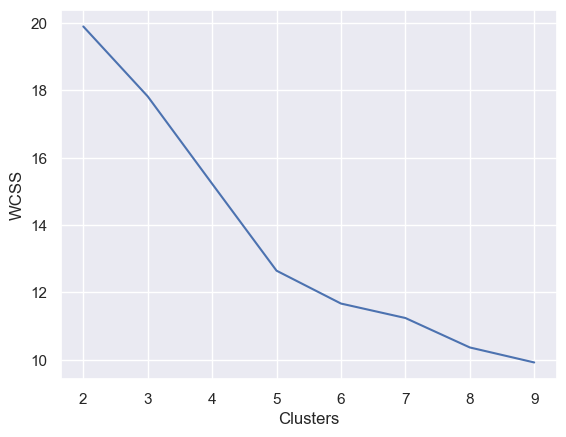

In [81]:
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import cdist


X = pca_transformed_df.drop(columns=['championName'])


clusters_list = []
wcss_list = []

for k in range(2,10):
    kmeans = MiniBatchKMeans(n_clusters= k, random_state=42)
    fitted_kmeans = kmeans.fit(X)
    wcss = sum(np.min(cdist(X, fitted_kmeans.cluster_centers_, 'euclidean'), axis = 1) ** 2 / X.shape[0])
    clusters_list.append(k)
    wcss_list.append(wcss)

elbow_method = {'Clusters': clusters_list, 'WCSS': wcss_list}
elbow_df = pd.DataFrame(elbow_method)
sns.lineplot(data = elbow_df, x = 'Clusters', y = 'WCSS')

In [82]:
kmeans = MiniBatchKMeans(n_clusters=6, random_state = 42)
kmeans.fit(X)

# Create new column in dataframe with cluster labels
X['cluster'] = kmeans.labels_

# Add champion names back in
X['championName'] = champion_names

In [90]:
X[X['cluster'] == 5]['championName'].value_counts().head(20)

championName
Nocturne    5925
Lillia      5621
Briar       5091
MasterYi    4573
Kayn        4499
Warwick     4366
Viego       3912
Brand       3097
Zac         2873
Vi          2845
Graves      2757
LeeSin      2598
XinZhao     2541
Amumu       2379
Evelynn     2275
Belveth     2244
Nunu        2211
Khazix      2206
Hecarim     2155
Udyr        2151
Name: count, dtype: int64

In [72]:
for cluster_number in X['cluster'].unique():
    X[X['cluster'] == cluster_number]['champion_names'].value_counts().head(10)

4
0
3
1
2


In [91]:
X[X['cluster'] == 4]['championName'].value_counts()

championName
MissFortune    6593
Smolder        6536
Jhin           6225
Caitlyn        5474
Yasuo          5029
               ... 
Diana             1
Zilean            1
Fizz              1
Janna             1
Nautilus          1
Name: count, Length: 116, dtype: int64

<Axes: xlabel='Carry Potential', ylabel='Tankiness'>

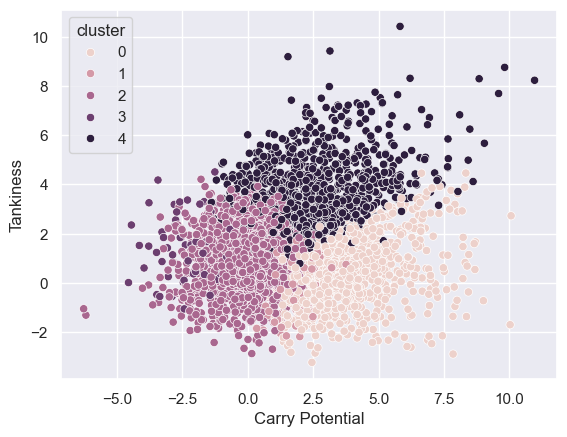

In [67]:
sns.scatterplot(data = X[X['championName'] == 'Sion'], x = 'Carry Potential', y = 'Tankiness', hue = 'cluster')

<Axes: xlabel='Tankiness', ylabel='Support'>

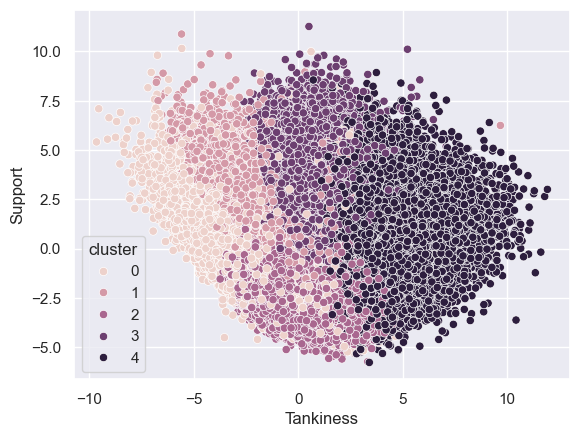

In [26]:
sns.scatterplot(data = X, x ='Tankiness', y ='Support', hue = 'cluster')

<Axes: xlabel='Carry Potential', ylabel='Support'>

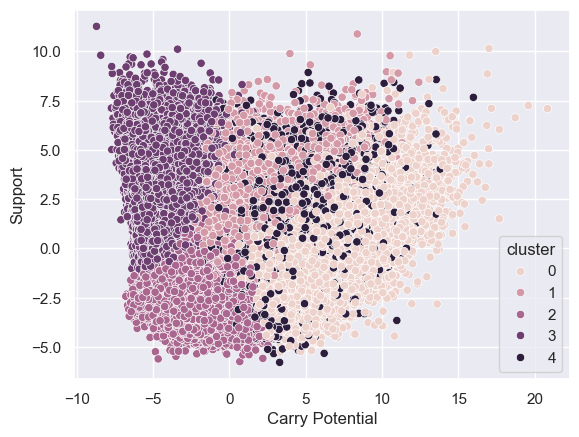

In [28]:
sns.scatterplot(data = X, x = 'Carry Potential', y = 'Support', hue = 'cluster')

In [92]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan.fit(X.drop(columns = ['championName', 'cluster']))

DBSCAN()

In [93]:
X

,Carry Potential,Tankiness,Support,Mage Ability,Vulnerability,Tower Pushing,cluster,championName
0,5.034639,5.196354,-1.477222,1.517466,2.002908,4.096196,5,Sion
1,3.412123,3.181579,0.048831,0.863296,-0.566061,0.595606,5,Shyvana
2,2.831461,-1.091544,-0.792358,-0.562903,3.214349,-1.400218,4,Akshan
4,-3.203276,-0.119796,0.695072,-0.238359,-1.251933,0.565920,3,Bard
5,-0.679646,2.092239,-1.085242,4.076151,0.339463,1.249736,1,Singed
...,...,...,...,...,...,...,...,...
719585,4.664797,-1.648806,-1.649600,0.014881,2.123106,-0.245824,0,Jayce
719586,3.343707,6.615675,1.110587,2.813176,-0.480567,-1.112418,5,Lillia
719587,2.191028,0.525976,-1.915752,0.245071,1.124007,0.727325,4,Yasuo
719588,-2.876021,0.035423,0.179409,0.598789,0.245237,0.943394,2,Thresh


In [94]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 42)


tsne.fit(X.drop(columns = ['cluster', 'championName']).sample(10000))

TSNE(random_state=42)